# Receipts Table Data Exploration

In [1]:
import pandas as pd
from datetime import datetime
import json
import matplotlib.pyplot as plt

In [3]:
# Function to convert Id and timestamp structures to Python objects
def convert_objects(row):
    for key, value in row.items():
        if isinstance(value, dict) and "$oid" in value:
            row[key] = value["$oid"]
        # Convert Date in Unix timestamp format (milliseconds since the epoch)
        elif isinstance(value, dict) and "$date" in value:
            timestamp = value["$date"] / 1000  # Convert milliseconds to seconds
            row[key] = datetime.fromtimestamp(timestamp)
    return row

In [4]:
# Read and convert the JSON file
receipts_df = pd.read_json('receipts.json', lines=True)
receipts_df = receipts_df.apply(convert_objects, axis=1)
receipts_df.head()

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,5ff1e1eb0a720f0523000575,500.0,"Receipt number 2 completed, bonus point schedu...",2021-01-03 09:25:31,2021-01-03 09:25:31,2021-01-03 09:25:31,2021-01-03 09:25:36,2021-01-03 09:25:31,500.0,2021-01-02 18:00:00,5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.0,5ff1e1eacfcf6c399c274ae6
1,5ff1e1bb0a720f052300056b,150.0,"Receipt number 5 completed, bonus point schedu...",2021-01-03 09:24:43,2021-01-03 09:24:43,2021-01-03 09:24:43,2021-01-03 09:24:48,2021-01-03 09:24:43,150.0,2021-01-02 09:24:43,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.0,5ff1e194b6a9d73a3a9f1052
2,5ff1e1f10a720f052300057a,5.0,All-receipts receipt bonus,2021-01-03 09:25:37,2021-01-03 09:25:37,NaT,2021-01-03 09:25:42,NaT,5.0,2021-01-02 18:00:00,1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.0,5ff1e1f1cfcf6c399c274b0b
3,5ff1e1ee0a7214ada100056f,5.0,All-receipts receipt bonus,2021-01-03 09:25:34,2021-01-03 09:25:34,2021-01-03 09:25:34,2021-01-03 09:25:39,2021-01-03 09:25:34,5.0,2021-01-02 18:00:00,4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.0,5ff1e1eacfcf6c399c274ae6
4,5ff1e1d20a7214ada1000561,5.0,All-receipts receipt bonus,2021-01-03 09:25:06,2021-01-03 09:25:06,2021-01-03 09:25:11,2021-01-03 09:25:11,2021-01-03 09:25:06,5.0,2021-01-02 09:25:06,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.0,5ff1e194b6a9d73a3a9f1052


In [5]:
#create a new table using rewardsReceiptItemList and concat receipt_id to connect tables
receipt_items_df = pd.json_normalize(receipts_df.explode('rewardsReceiptItemList')['rewardsReceiptItemList'])
receipt_ids_df = receipts_df[['_id','rewardsReceiptItemList']].explode('rewardsReceiptItemList').reset_index(drop=True).drop(columns='rewardsReceiptItemList')
receipt_ids_df = receipt_ids_df.rename(columns={'_id':'receipt_id'})
receipt_items_df = pd.concat([receipt_ids_df, receipt_items_df], axis=1)
receipt_items_df.head()

,receipt_id,barcode,description,finalPrice,itemPrice,needsFetchReview,partnerItemId,preventTargetGapPoints,quantityPurchased,userFlaggedBarcode,...,itemNumber,originalMetaBriteQuantityPurchased,pointsEarned,targetPrice,competitiveProduct,originalFinalPrice,originalMetaBriteItemPrice,deleted,priceAfterCoupon,metabriteCampaignId
0,5ff1e1eb0a720f0523000575,4011,ITEM NOT FOUND,26.00,26.00,False,1,True,5.0,4011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5ff1e1bb0a720f052300056b,4011,ITEM NOT FOUND,1,1,NaN,1,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5ff1e1bb0a720f052300056b,028400642255,DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCE...,10.00,10.00,True,2,True,1.0,028400642255,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5ff1e1f10a720f052300057a,NaN,NaN,NaN,NaN,False,1,True,NaN,4011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5ff1e1ee0a7214ada100056f,4011,ITEM NOT FOUND,28.00,28.00,False,1,True,4.0,4011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Receipts Table

In [6]:
#checking table information
receipts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   _id                      1119 non-null   object        
 1   bonusPointsEarned        544 non-null    float64       
 2   bonusPointsEarnedReason  544 non-null    object        
 3   createDate               1119 non-null   datetime64[ns]
 4   dateScanned              1119 non-null   datetime64[ns]
 5   finishedDate             568 non-null    datetime64[ns]
 6   modifyDate               1119 non-null   datetime64[ns]
 7   pointsAwardedDate        537 non-null    datetime64[ns]
 8   pointsEarned             609 non-null    float64       
 9   purchaseDate             671 non-null    datetime64[ns]
 10  purchasedItemCount       635 non-null    float64       
 11  rewardsReceiptItemList   679 non-null    object        
 12  rewardsReceiptStatus     1119 non-

In [7]:
#checking null counts
receipts_df.isnull().sum()

_id                          0
bonusPointsEarned          575
bonusPointsEarnedReason    575
createDate                   0
dateScanned                  0
finishedDate               551
modifyDate                   0
pointsAwardedDate          582
pointsEarned               510
purchaseDate               448
purchasedItemCount         484
rewardsReceiptItemList     440
rewardsReceiptStatus         0
totalSpent                 435
userId                       0
dtype: int64

In [8]:
#checking null percent
receipts_df.isnull().mean()

_id                        0.000000
bonusPointsEarned          0.513852
bonusPointsEarnedReason    0.513852
createDate                 0.000000
dateScanned                0.000000
finishedDate               0.492404
modifyDate                 0.000000
pointsAwardedDate          0.520107
pointsEarned               0.455764
purchaseDate               0.400357
purchasedItemCount         0.432529
rewardsReceiptItemList     0.393208
rewardsReceiptStatus       0.000000
totalSpent                 0.388740
userId                     0.000000
dtype: float64

In [9]:
#remove rewardsReceiptItemList from the receipts table
receipts_df=receipts_df.drop(columns=['rewardsReceiptItemList'])
receipts_df.head()

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptStatus,totalSpent,userId
0,5ff1e1eb0a720f0523000575,500.0,"Receipt number 2 completed, bonus point schedu...",2021-01-03 09:25:31,2021-01-03 09:25:31,2021-01-03 09:25:31,2021-01-03 09:25:36,2021-01-03 09:25:31,500.0,2021-01-02 18:00:00,5.0,FINISHED,26.0,5ff1e1eacfcf6c399c274ae6
1,5ff1e1bb0a720f052300056b,150.0,"Receipt number 5 completed, bonus point schedu...",2021-01-03 09:24:43,2021-01-03 09:24:43,2021-01-03 09:24:43,2021-01-03 09:24:48,2021-01-03 09:24:43,150.0,2021-01-02 09:24:43,2.0,FINISHED,11.0,5ff1e194b6a9d73a3a9f1052
2,5ff1e1f10a720f052300057a,5.0,All-receipts receipt bonus,2021-01-03 09:25:37,2021-01-03 09:25:37,NaT,2021-01-03 09:25:42,NaT,5.0,2021-01-02 18:00:00,1.0,REJECTED,10.0,5ff1e1f1cfcf6c399c274b0b
3,5ff1e1ee0a7214ada100056f,5.0,All-receipts receipt bonus,2021-01-03 09:25:34,2021-01-03 09:25:34,2021-01-03 09:25:34,2021-01-03 09:25:39,2021-01-03 09:25:34,5.0,2021-01-02 18:00:00,4.0,FINISHED,28.0,5ff1e1eacfcf6c399c274ae6
4,5ff1e1d20a7214ada1000561,5.0,All-receipts receipt bonus,2021-01-03 09:25:06,2021-01-03 09:25:06,2021-01-03 09:25:11,2021-01-03 09:25:11,2021-01-03 09:25:06,5.0,2021-01-02 09:25:06,2.0,FINISHED,1.0,5ff1e194b6a9d73a3a9f1052


In [10]:
#checking for duplicated records
receipts_df[receipts_df.duplicated()]

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptStatus,totalSpent,userId


In [11]:
#checking for duplicated receipt_ids
receipts_df[receipts_df['_id'].duplicated()]

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptStatus,totalSpent,userId


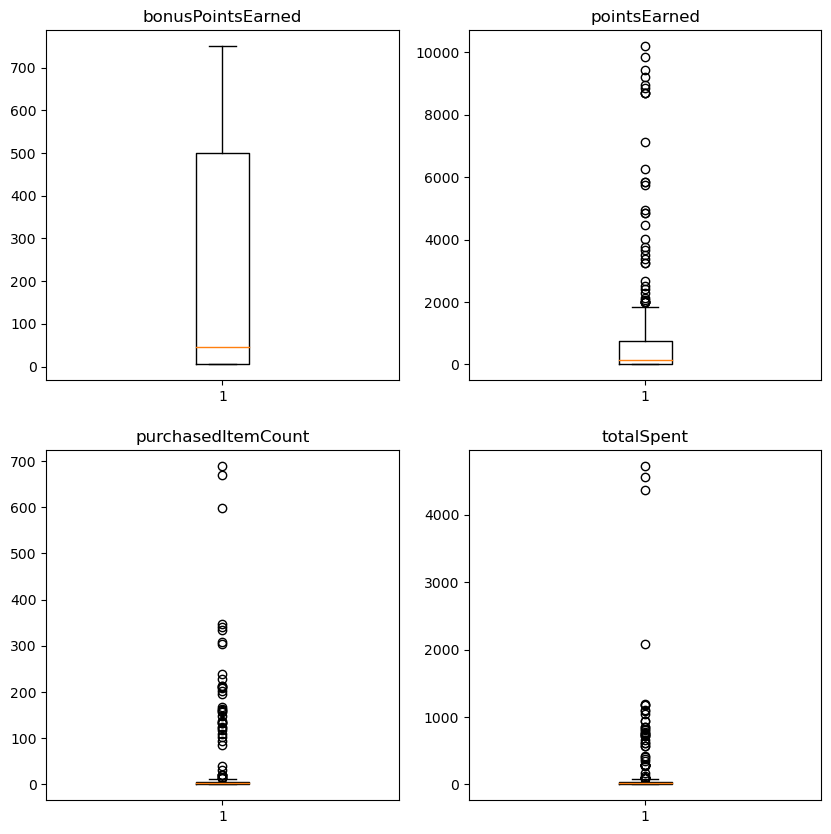

In [12]:
#checking for outliers and distribution using boxplots for bonusPointsEarned, pointsEarned, purchasedItemCount and totalSpent

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

axs[0, 0].boxplot(receipts_df['bonusPointsEarned'].dropna(), meanline=True)
axs[0, 0].set_title('bonusPointsEarned')

axs[0, 1].boxplot(receipts_df['pointsEarned'].dropna(), meanline=True)
axs[0, 1].set_title('pointsEarned')

axs[1, 0].boxplot(receipts_df['purchasedItemCount'].dropna(), meanline=True)
axs[1, 0].set_title('purchasedItemCount')

axs[1, 1].boxplot(receipts_df['totalSpent'].dropna(), meanline=True)
axs[1, 1].set_title('totalSpent')

plt.show()

In [53]:
#checking outliers in pointsEarned
receipts_df[receipts_df['pointsEarned']>2000].head(10)

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptStatus,totalSpent,userId
12,5ff1e1b60a7214ada100055c,150.0,"Receipt number 5 completed, bonus point schedu...",2021-01-03 09:24:38,2021-01-03 09:24:38,NaT,2021-01-03 09:24:38,NaT,8850.0,2021-02-03 09:24:38,10.0,FLAGGED,290.0,5ff1e194b6a9d73a3a9f1052
78,5fa5ad370a720f05ef000089,750.0,"Receipt number 1 completed, bonus point schedu...",2020-11-06 14:08:23,2020-11-06 14:08:23,2021-01-05 14:53:40,2021-01-05 14:53:40,2021-01-05 14:53:40,9449.8,2020-11-05 14:08:23,11.0,FINISHED,291.0,5fa5ad376a26f611e71ab5ef
121,5ff7946f0a720f052300063c,250.0,"Receipt number 3 completed, bonus point schedu...",2021-01-05 11:08:31,2021-01-05 11:08:31,2021-01-07 11:08:35,2021-01-07 17:08:37,2021-01-07 11:08:35,3250.0,2021-01-05 06:00:00,3.0,FINISHED,23.0,5ff79464b3348b11c933738b
126,5ff794940a720f0523000640,5.0,All-receipts receipt bonus,2021-01-05 11:09:08,2021-01-05 11:09:08,2021-01-07 11:09:11,2021-01-07 17:09:13,2021-01-07 11:09:11,4005.0,2021-01-05 06:00:00,3.0,FINISHED,23.0,5ff79464b3348b11c933738b
127,5ff794020a720f0523000635,5.0,All-receipts receipt bonus,2021-01-05 23:06:42,2021-01-05 23:06:42,2021-01-07 05:06:44,2021-01-07 11:06:46,2021-01-07 05:06:44,2005.0,2021-01-04 23:06:42,1.0,FINISHED,1.0,5ff7930fb3348b11c93372a6
131,5ff7945a0a7214ada1000646,750.0,"Receipt number 1 completed, bonus point schedu...",2021-01-05 11:08:10,2021-01-05 11:08:10,2021-01-07 11:08:14,2021-01-07 17:08:16,2021-01-07 11:08:14,5750.0,2021-01-05 06:00:00,4.0,FINISHED,27.0,5ff79459b3348b11c933736d
137,5ff794640a720f052300063b,750.0,"Receipt number 1 completed, bonus point schedu...",2021-01-05 11:08:20,2021-01-05 11:08:20,2021-01-07 11:08:26,2021-01-07 11:08:26,2021-01-07 11:08:26,3750.0,2021-01-05 06:00:00,2.0,FINISHED,21.0,5ff79464b3348b11c933738b
139,5ff73be10a7214ada1000619,NaN,NaN,2021-01-07 10:50:41,2021-01-07 10:50:41,NaT,2021-01-07 10:50:41,NaT,8700.0,2021-02-07 10:50:41,10.0,FLAGGED,290.0,5ff73b90eb7c7d31ca8a452b
143,5ff7942e0a720f0523000637,5.0,All-receipts receipt bonus,2021-01-05 17:07:26,2021-01-05 17:07:26,2021-01-07 17:07:36,2021-01-07 17:07:36,2021-01-06 23:07:29,2005.0,2021-01-04 17:07:26,2.0,FINISHED,1.0,5ff7930fb3348b11c93372a6
146,5ff794130a7214ada1000640,5.0,All-receipts receipt bonus,2021-01-05 17:06:59,2021-01-05 17:06:59,2021-01-07 17:07:08,2021-01-07 17:07:08,2021-01-06 23:07:02,2005.0,2021-01-04 17:06:58,2.0,FINISHED,1.0,5ff7930fb3348b11c93372a6


In [13]:
#checking records that have 0 points earned. Many of the null values could be due to 0 points being earned
receipts_df[receipts_df['pointsEarned']==0]

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptStatus,totalSpent,userId
123,5ff774200a7214ada1000638,NaN,NaN,2021-01-07 14:50:40,2021-01-07 14:50:40,2021-01-07 14:50:40,2021-01-07 14:50:40,NaT,0.0,2021-01-06 18:00:00,2.0,FINISHED,6.18,5ff7741e04929111f6e90902
174,5ff8c8880a7214adca000008,NaN,NaN,2021-01-08 15:03:04,2021-01-08 15:03:04,2021-01-08 15:03:05,2021-01-08 15:03:05,NaT,0.0,2021-01-07 18:00:00,2.0,FINISHED,6.18,5ff8c88604929111f6e913b7
186,5ffc8cc20a720f05c5000026,NaN,NaN,2021-01-11 01:37:06,2021-01-11 01:37:06,2021-01-11 06:38:01,2021-01-11 06:38:01,NaT,0.0,2021-01-10 08:00:00,1.0,FINISHED,3.09,5ffc8cc104929111f6e922a3
206,5ffc8cb40a720f05c5000025,NaN,NaN,2021-01-11 01:36:52,2021-01-11 01:36:52,2021-01-11 06:36:56,2021-01-11 06:36:56,NaT,0.0,2021-01-10 08:00:00,1.0,FINISHED,3.09,5ffc8cb304929111f6e9229d


In [15]:
#checking records that have 0 bonus points earned.
receipts_df[receipts_df['bonusPointsEarned']==0]

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptStatus,totalSpent,userId


In [16]:
#Checking outliers for totalSpent
receipts_df[receipts_df['totalSpent']>1000]

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptStatus,totalSpent,userId
314,60025cb80a720f05f300008d,750.0,"Receipt number 1 completed, bonus point schedu...",2021-01-15 21:25:44,2021-01-15 21:25:44,2021-01-15 21:31:55,2021-01-15 21:32:05,2021-01-15 21:31:55,1658.3,2021-01-14 18:00:00,335.0,FINISHED,1177.84,60025c65fb296c4ef805d9e6
318,600260210a720f05f300008f,750.0,"Receipt number 1 completed, bonus point schedu...",2021-01-15 21:40:17,2021-01-15 21:40:17,2021-01-15 21:47:26,2021-01-15 21:47:31,2021-01-15 21:47:26,3659.4,2021-01-14 18:00:00,309.0,FINISHED,1043.18,60025fe0e257124ec6b99a87
407,60099c3c0a7214ad89000135,750.0,"Receipt number 1 completed, bonus point schedu...",2021-01-21 09:22:36,2021-01-21 09:22:36,2021-01-21 09:28:37,2021-01-21 09:31:10,2021-01-21 09:28:37,4480.5,2021-01-20 18:00:00,341.0,FINISHED,1083.24,60099c1450b33111fd61f702
419,600996ac0a720f05fa000134,750.0,"Receipt number 1 completed, bonus point schedu...",2021-01-21 08:58:52,2021-01-21 08:58:52,2021-01-21 09:11:25,2021-01-21 09:16:08,2021-01-21 09:11:25,6257.3,2021-01-16 18:00:00,348.0,FINISHED,1198.68,6009969150b33111fd61f6d9
423,600a1a8d0a7214ada2000008,750.0,"Receipt number 1 completed, bonus point schedu...",2021-01-21 18:21:32,2021-01-21 18:21:32,2021-01-21 18:30:13,2021-01-21 18:31:04,2021-01-21 18:30:13,1178.7,2021-01-20 18:00:00,214.0,FINISHED,1183.10,600a1a457d983a124e9adb9b
431,600ba6ae0a7214ada2000010,750.0,"Receipt number 1 completed, bonus point schedu...",2021-01-22 22:31:42,2021-01-22 22:31:42,2021-01-22 22:39:28,2021-01-22 22:41:47,2021-01-22 22:39:28,1044.3,2021-01-21 18:00:00,136.0,FINISHED,1107.82,600ba68e7d983a124e9ae1d3
446,600f24970a720f053500002f,NaN,NaN,2021-01-25 14:05:43,2021-01-25 14:05:43,NaT,2021-01-25 14:25:25,NaT,NaN,2021-01-24 18:00:00,599.0,FLAGGED,4368.80,600f20c15edb787dce060911
447,600f0cc70a720f053500002c,NaN,NaN,2021-01-25 12:24:07,2021-01-25 12:24:07,NaT,2021-01-25 12:38:07,NaT,NaN,2021-01-24 18:00:00,303.0,FLAGGED,2084.82,600f00d05edb787dce05fb84
469,600f39c30a7214ada2000030,750.0,"Receipt number 1 completed, bonus point schedu...",2021-01-25 15:36:03,2021-01-25 15:36:03,2021-01-25 21:06:03,2021-01-25 21:07:40,2021-01-25 21:06:03,7137.2,2021-01-23 18:00:00,670.0,FINISHED,4721.95,600f35015edb782098e2ac1b
543,600f2fc80a720f0535000030,750.0,"Receipt number 1 completed, bonus point schedu...",2021-01-25 14:53:28,2021-01-25 14:53:28,2021-01-25 16:04:23,2021-01-28 16:37:02,2021-01-25 16:04:23,4944.7,2021-01-23 18:00:00,689.0,FINISHED,4566.17,600f29a64329897eac239049


In [18]:
#checking if null values for points earned is common amongst users with a 'FLAGGED' rewardsReceiptStatus
receipts_df[receipts_df['rewardsReceiptStatus']=='FLAGGED'].head(10)

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptStatus,totalSpent,userId
12,5ff1e1b60a7214ada100055c,150.0,"Receipt number 5 completed, bonus point schedu...",2021-01-03 09:24:38,2021-01-03 09:24:38,NaT,2021-01-03 09:24:38,NaT,8850.0,2021-02-03 09:24:38,10.0,FLAGGED,290.0,5ff1e194b6a9d73a3a9f1052
15,5ff1e1e90a7214ada1000569,NaN,NaN,2021-01-03 09:25:29,2021-01-03 09:25:29,NaT,2021-01-03 09:25:29,NaT,NaN,NaT,0.0,FLAGGED,0.0,5ff1e1e9b6a9d73a3a9f10f6
17,5ff1e1b40a7214ada100055b,750.0,"Receipt number 1 completed, bonus point schedu...",2021-01-03 09:24:36,2021-01-03 09:24:36,NaT,2021-01-03 09:24:37,2021-01-03 09:24:36,750.0,2021-01-02 09:24:36,1.0,FLAGGED,1.0,5ff1e1b4cfcf6c399c274a54
75,5ff4ce690a7214ada10005e2,750.0,"Receipt number 1 completed, bonus point schedu...",2021-01-05 14:39:05,2021-01-05 14:39:05,NaT,2021-01-05 14:39:07,2021-01-05 14:39:06,810.0,2021-01-04 14:39:04,5.0,FLAGGED,13.0,5ff4ce68c1e2d0121a9b3022
79,5ff4ce650a7214ada10005e1,750.0,"Receipt number 1 completed, bonus point schedu...",2021-01-05 14:39:01,2021-01-05 14:39:01,NaT,2021-01-05 14:39:02,2021-01-05 14:39:02,750.0,2021-01-04 14:39:01,1.0,FLAGGED,1.0,5ff4ce65c3d63511e2a4853b
81,5ff4ce3c0a720f05230005c4,NaN,NaN,2021-01-05 14:38:20,2021-01-05 14:38:20,NaT,2021-01-05 14:38:20,NaT,NaN,NaT,0.0,FLAGGED,0.0,5ff4ce3cc1e2d0121a9b2fba
129,5ff794bf0a7214ada1000650,25.0,COMPLETE_NONPARTNER_RECEIPT,2021-01-06 17:09:51,2021-01-06 17:09:51,NaT,2021-01-07 11:09:53,NaT,25.0,2021-01-05 17:09:51,1.0,FLAGGED,1.0,5ff7930fb3348b11c93372a6
139,5ff73be10a7214ada1000619,NaN,NaN,2021-01-07 10:50:41,2021-01-07 10:50:41,NaT,2021-01-07 10:50:41,NaT,8700.0,2021-02-07 10:50:41,10.0,FLAGGED,290.0,5ff73b90eb7c7d31ca8a452b
141,5ff73be90a720f052300060a,NaN,NaN,2021-01-07 10:50:49,2021-01-07 10:50:49,NaT,2021-01-07 10:50:49,NaT,NaN,NaT,0.0,FLAGGED,0.0,5ff73be9eb7c7d31ca8a45bc
144,5ff794600a7214ada1000647,NaN,NaN,2021-01-06 23:08:16,2021-01-06 23:08:16,NaT,2021-01-07 11:08:17,NaT,NaN,NaT,0.0,FLAGGED,0.0,5ff7946004929111f6e90ceb


## Receipt Items Table

In [19]:
#analyzing receipt_items table, cheking
receipt_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   receipt_id                          7381 non-null   object 
 1   barcode                             3090 non-null   object 
 2   description                         6560 non-null   object 
 3   finalPrice                          6767 non-null   object 
 4   itemPrice                           6767 non-null   object 
 5   needsFetchReview                    813 non-null    object 
 6   partnerItemId                       6941 non-null   object 
 7   preventTargetGapPoints              358 non-null    object 
 8   quantityPurchased                   6767 non-null   float64
 9   userFlaggedBarcode                  337 non-null    object 
 10  userFlaggedNewItem                  323 non-null    object 
 11  userFlaggedPrice                    299 non

In [20]:
#Checking percentage of null values
receipt_items_df.isnull().mean()

receipt_id                            0.000000
barcode                               0.581358
description                           0.111232
finalPrice                            0.083187
itemPrice                             0.083187
needsFetchReview                      0.889852
partnerItemId                         0.059613
preventTargetGapPoints                0.951497
quantityPurchased                     0.083187
userFlaggedBarcode                    0.954342
userFlaggedNewItem                    0.956239
userFlaggedPrice                      0.959491
userFlaggedQuantity                   0.959491
needsFetchReviewReason                0.970329
pointsNotAwardedReason                0.953936
pointsPayerId                         0.828343
rewardsGroup                          0.765479
rewardsProductPartnerId               0.692589
userFlaggedDescription                0.972226
originalMetaBriteBarcode              0.990381
originalMetaBriteDescription          0.998645
brandCode    

In [21]:
receipt_items_df.head(10)

,receipt_id,barcode,description,finalPrice,itemPrice,needsFetchReview,partnerItemId,preventTargetGapPoints,quantityPurchased,userFlaggedBarcode,...,itemNumber,originalMetaBriteQuantityPurchased,pointsEarned,targetPrice,competitiveProduct,originalFinalPrice,originalMetaBriteItemPrice,deleted,priceAfterCoupon,metabriteCampaignId
0,5ff1e1eb0a720f0523000575,4011,ITEM NOT FOUND,26.00,26.00,False,1,True,5.0,4011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5ff1e1bb0a720f052300056b,4011,ITEM NOT FOUND,1,1,NaN,1,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5ff1e1bb0a720f052300056b,028400642255,DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCE...,10.00,10.00,True,2,True,1.0,028400642255,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5ff1e1f10a720f052300057a,NaN,NaN,NaN,NaN,False,1,True,NaN,4011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5ff1e1ee0a7214ada100056f,4011,ITEM NOT FOUND,28.00,28.00,False,1,True,4.0,4011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5ff1e1d20a7214ada1000561,4011,ITEM NOT FOUND,1,1,NaN,1,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5ff1e1d20a7214ada1000561,1234,NaN,2.56,2.56,True,2,True,3.0,1234,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5ff1e1e40a7214ada1000566,4011,ITEM NOT FOUND,3.25,3.25,False,1,True,1.0,4011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5ff1e1cd0a720f052300056f,NaN,MSSN TORTLLA,2.23,2.23,NaN,1009,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5ff1e1a40a720f0523000569,046000832517,"Old El Paso Mild Chopped Green Chiles, 4.5 Oz",10.00,10.00,NaN,0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
#Checking for repeated barcodes as it looks like there are a lot of items with barcode 4011
receipt_items_df['barcode'].value_counts()

barcode
4011            177
036000320893     92
034100573065     90
036000391718     87
012000809941     76
               ... 
4562              1
021000701445      1
021000026999      1
686924560242      1
665290001184      1
Name: count, Length: 568, dtype: int64

In [27]:
#checking barcodes with 4 characters
barcodes_4_char=receipt_items_df[receipt_items_df['barcode'].str.len()==4]
barcodes_4_char

,receipt_id,barcode,description,finalPrice,itemPrice,needsFetchReview,partnerItemId,preventTargetGapPoints,quantityPurchased,userFlaggedBarcode,...,itemNumber,originalMetaBriteQuantityPurchased,pointsEarned,targetPrice,competitiveProduct,originalFinalPrice,originalMetaBriteItemPrice,deleted,priceAfterCoupon,metabriteCampaignId
0,5ff1e1eb0a720f0523000575,4011,ITEM NOT FOUND,26.00,26.00,False,1,True,5.0,4011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5ff1e1bb0a720f052300056b,4011,ITEM NOT FOUND,1,1,NaN,1,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5ff1e1ee0a7214ada100056f,4011,ITEM NOT FOUND,28.00,28.00,False,1,True,4.0,4011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5ff1e1d20a7214ada1000561,4011,ITEM NOT FOUND,1,1,NaN,1,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5ff1e1d20a7214ada1000561,1234,NaN,2.56,2.56,True,2,True,3.0,1234,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7186,602538960a720f05a800021b,4011,ITEM NOT FOUND,23.00,23.00,False,1,True,2.0,4011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7187,602558b40a7214d8e9000263,4011,ITEM NOT FOUND,26.00,26.00,False,1,True,2.0,4011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7191,60268cab0a7214d8e9000315,4011,ITEM NOT FOUND,1,1,False,1,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7206,60268c7e0a7214d8e9000309,4011,ITEM NOT FOUND,29.00,29.00,False,1,True,3.0,4011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
#checking value counts for barcodes with 4 characters
barcodes_4_char['barcode'].value_counts()

barcode
4011    177
1234     32
4166     15
4816     14
4060     12
4069     12
4093     12
4023     10
4225      5
3435      5
4061      5
4090      4
3332      3
4608      3
4066      3
4068      2
4078      2
4053      2
4540      2
4067      2
4614      2
3283      1
4072      1
4563      1
4662      1
4131      1
4135      1
4562      1
4759      1
Name: count, dtype: int64

In [33]:
#checking barcode '4011'
barcodes_4_char[barcodes_4_char['barcode']=='4011'].head(10)

,receipt_id,barcode,description,finalPrice,itemPrice,needsFetchReview,partnerItemId,preventTargetGapPoints,quantityPurchased,userFlaggedBarcode,...,itemNumber,originalMetaBriteQuantityPurchased,pointsEarned,targetPrice,competitiveProduct,originalFinalPrice,originalMetaBriteItemPrice,deleted,priceAfterCoupon,metabriteCampaignId
0,5ff1e1eb0a720f0523000575,4011,ITEM NOT FOUND,26.00,26.00,False,1,True,5.0,4011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5ff1e1bb0a720f052300056b,4011,ITEM NOT FOUND,1,1,NaN,1,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5ff1e1ee0a7214ada100056f,4011,ITEM NOT FOUND,28.00,28.00,False,1,True,4.0,4011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5ff1e1d20a7214ada1000561,4011,ITEM NOT FOUND,1,1,NaN,1,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5ff1e1e40a7214ada1000566,4011,ITEM NOT FOUND,3.25,3.25,False,1,True,1.0,4011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,5ff1e1ed0a7214ada100056e,4011,ITEM NOT FOUND,20.00,20.00,False,1,True,5.0,4011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,5ff1e1eb0a7214ada100056b,4011,ITEM NOT FOUND,20.00,20.00,False,1,True,3.0,4011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,5ff1e1c50a720f052300056c,4011,ITEM NOT FOUND,1,1,NaN,1,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,5ff1e1b20a7214ada100055a,4011,ITEM NOT FOUND,1,1,NaN,1,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,5ff1e1df0a7214ada1000564,4011,ITEM NOT FOUND,1,1,False,1,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
#checking barcode '1234'
barcodes_4_char[barcodes_4_char['barcode']=='1234'].head(10)

,receipt_id,barcode,description,finalPrice,itemPrice,needsFetchReview,partnerItemId,preventTargetGapPoints,quantityPurchased,userFlaggedBarcode,...,itemNumber,originalMetaBriteQuantityPurchased,pointsEarned,targetPrice,competitiveProduct,originalFinalPrice,originalMetaBriteItemPrice,deleted,priceAfterCoupon,metabriteCampaignId
6,5ff1e1d20a7214ada1000561,1234,NaN,2.56,2.56,True,2,True,3.0,1234,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,5ff1e1c80a720f052300056d,1234,NaN,NaN,NaN,True,2,True,NaN,1234,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,5ff1e1c60a7214ada100055e,1234,NaN,NaN,NaN,True,2,True,NaN,1234,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,5ff1e1cf0a720f0523000570,1234,NaN,NaN,NaN,True,2,True,NaN,1234,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,5ff4ce550a7214ada10005db,1234,NaN,NaN,NaN,True,2,True,NaN,1234,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241,5ff4ce4e0a7214ada10005da,1234,NaN,NaN,NaN,True,2,True,NaN,1234,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
353,5ff726790a7214ada1000602,1234,NaN,NaN,NaN,True,2,True,NaN,1234,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
359,5ff726810a720f05230005ea,1234,NaN,2.56,2.56,True,2,True,3.0,1234,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
371,5ff73bae0a720f0523000600,1234,NaN,NaN,NaN,True,2,True,NaN,1234,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
376,5ff7942e0a720f0523000637,1234,NaN,NaN,NaN,True,2,True,NaN,1234,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
#checking barcode '4166'
barcodes_4_char[barcodes_4_char['barcode']=='4166'].head(10)

,receipt_id,barcode,description,finalPrice,itemPrice,needsFetchReview,partnerItemId,preventTargetGapPoints,quantityPurchased,userFlaggedBarcode,...,itemNumber,originalMetaBriteQuantityPurchased,pointsEarned,targetPrice,competitiveProduct,originalFinalPrice,originalMetaBriteItemPrice,deleted,priceAfterCoupon,metabriteCampaignId
738,600206000a720f05f3000087,4166,Other Sweet Onions,0.91,0.91,NaN,1058,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
822,600208270a720f05f3000088,4166,Other Sweet Onions,0.91,0.91,NaN,1058,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
928,600373700a720f05f3000091,4166,Other Sweet Onions,0.91,0.91,NaN,1065,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1063,60023e8f0a720f05f300008b,4166,Other Sweet Onions,0.91,0.91,NaN,1057,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1202,60020d2a0a720f05f300008a,4166,Other Sweet Onions,0.91,0.91,NaN,1058,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1432,60025cb80a720f05f300008d,4166,Other Sweet Onions,0.91,0.91,NaN,1099,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.91,NaN
1616,600370250a720f05f3000090,4166,Other Sweet Onions,0.91,0.91,NaN,1064,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1771,600260210a720f05f300008f,4166,Other Sweet Onions,0.91,0.91,NaN,1067,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.91,NaN
1988,6004a5f20a7214ad4c000088,4166,Other Sweet Onions,0.91,0.91,NaN,1075,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2113,6004a5f20a7214ad4c000088,4166,Other Sweet Onions,1.31,1.31,NaN,1305,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
#checking descriptions and counts for barcodes with 4 characters
barcodes_4_char[['barcode', 'description','receipt_id']].groupby(by=['barcode','description'], dropna=False).count()

receipt_id
barcode description                          
1234    NaN                                32
3283    Large Honeycrisp Apples             1
3332    Baby Spinach                        3
3435    Pinova Apples                       5
4011    BANANAS                             2
        ITEM NOT FOUND                    160
        Yellow Bananas                      6
        NaN                                 9
4023    Flame Red Seedless Grapes          10
4053    Large Lemons                        2
4060    Broccoli                           12
4061    Iceberg Lettuce                     5
4066    Green Beans                         3
4067    Zucchini Squash                     2
4068    Green Onions                        2
4069    Green Cabbage                      12
4072    Russet Potato                       1
4078    Sweet Corn Corn                     2
4090    Regular Spinach                     4
4093    Large Yellow Onions                11
        ONIONS                              1
4131    Large Fuji Apples                   1
4135    Large Gala Apples                   1
4166    Other Sweet Onions                 15
4225    Large Hass Avocados                 5
4540    Loose Beets                         2
4562    Loose Carrots                       1
4563    Carrot Sticks Carrots               1
4608    Regular Garlic                      3
4614    Collard Greens                      2
4662    Shallots Onions                     1
4759    Butternut Squash                    1
4816    Golden Sweet Potato                14

### Data Quality Issues: Receipts Table and Receipt Items Table

Receipts Table:  

1. Null Values:

    There is a lot of null data for many features in this table, but some of the important ones to consider are bonusPointsEarned, finishedDate, pointsAwardedDate, pointsEarned, PurchaseDate, purchasedItemCount, rewardsReceiptItemList, and totalSpent. Approximately 40-50% of the data is missing from these columns.  
    
    Missing values in bonusPointsEarned and pointsEarned could be due to many of the receipts not earning any points. There are no records for 0 bonnusPointsEarned and only 4 records with 0 pointsEarned. Analyzing the outliers for totalSpent shows some receipts that have a high totalSpend have null values in pointsEarned and bonusPointsEarned. This could be due to the rewardsReceiptStatus being 'Flagged'; however not all 'Flagged' receipts have null values in pointsEarned. These issues could cause consumers that should have earned points to not earn any points for their purchse. It can also disrupt analysis and models involving points.  
    
    Missing values in rewardsReceiptItemList can cause issues with analysis and marketing efforts as there won't be any information on what is purchased in these receipts.
    
    Missing values for dates, particularly the purchaseDate can lead to issues in time-series analysis and forecasting.
    
2. Outliers:  

    There are outliers evident in pointsEarned, purchasedItemCount, and totalSpent. These will need to be considered when performing analysis. Upon Looking into outlier records for pointsEarned, there are some records that have a very large number of points earned for a very low totalSpent value. This could be an issue with the points calculation system and could lead to loss of revenue if it is exploited. 
    
    
Receipt Item List Table:  

1. Null values:
    There is a lot of null fields in this table. This table was formatted from an unstructured nested column, and not all the items have the same information provided. This is ok for some of the features that are specific to certain products such as metaBrite or userFlagged information: however, this is a concern for more important fields like barcode, finalPrice, itemPrice, quantityPurchased, and brandCode.  
    
    itemPrice, finalPrice, and quantityPurchased have 8.3% null values. These are important fields for analysis involving item prices; however because the null value percent is low, there are multiple solutions to consider if utilizing these fields for analysis. The rows can be dropped or the values can be imputed using the mean prices and quantityPurchased amongst records that have the same brandCode or brand category.  
    
    brandCode is an important field as it connects to the brands table and has 64.8% null values. Records missing this information will also be missing any associated brand information. This can cause issues with analysis involving brands and marketing efforts for specific brands that are not represented due the lack of a brandCode.  
    
    barcode is another important field and has 58.1% null values. All items should have a unique barcode that may be used to pull in other item information. In addition to the null values, there are some barcodes like '4011' and '1234' which show up often an indicate some type of error with the barcode. '4011' usually indicates that the item is not found, but is also the barcode for bananas and some null values. All of the barcodes with '1234' have null values in most of the other fields.
    
